# Configure Your Data Folder
*(Consider Linking your Google Drive. It's easier like that.)*

[INFO] Found /content/drive/MyDrive/Data/CTRNN-dev/CTRNN_checkpoint_00001.csv
[INFO] Output Folder Found


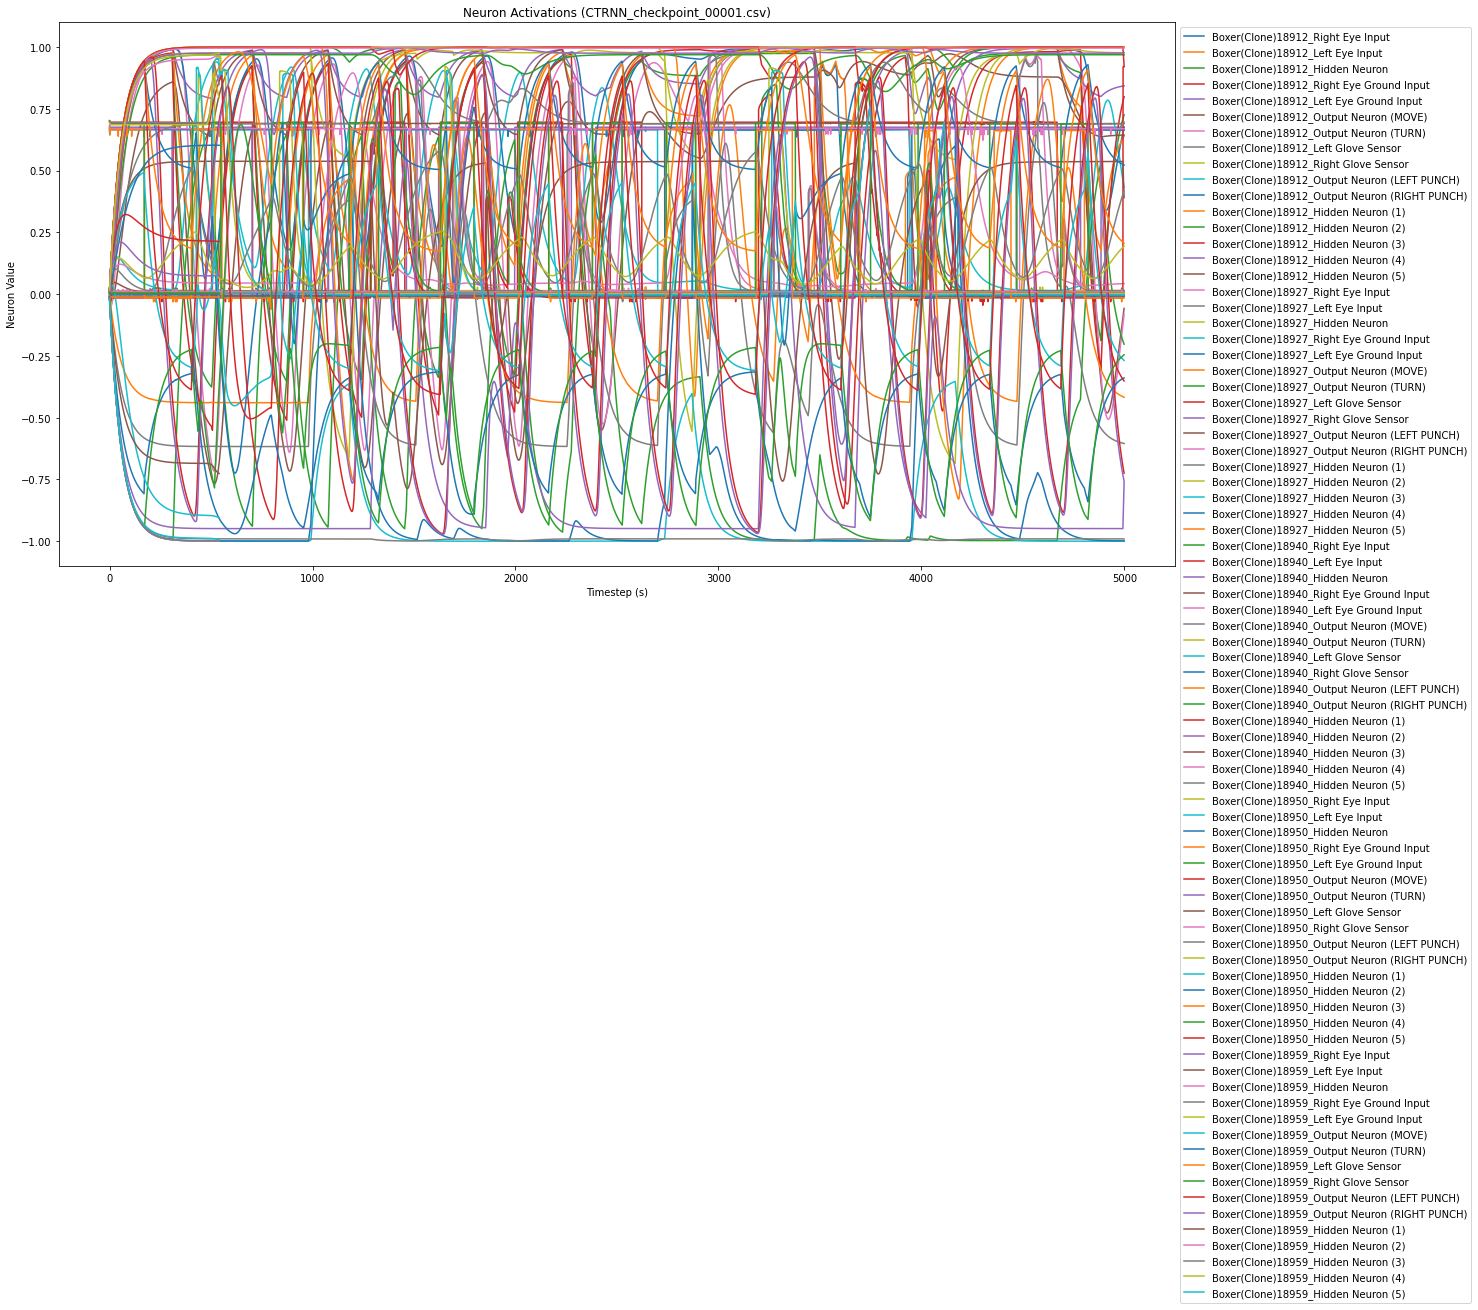

In [119]:
# (CONFIGURE) The directory of data CSV files
data_folder = "/content/drive/MyDrive/Data/CTRNN-dev"

# If this is left empty, the output will be a new folder within the data folder.
output_folder = "" 

import csv
import matplotlib.pyplot as plt
import os

all_data = {}
files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

for filename in files:
    print(f"[INFO] Found {data_folder}/{filename}")
    file_data = {}
    with open(f"{data_folder}/{filename}") as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        rows = [k for k in reader]
        for row in rows:
            file_data[row[0]] = [float(i) for i in row[1:]]
    all_data[filename] = file_data

if not output_folder:
    try:
        output_folder = f"{data_folder}/output/"
        os.mkdir(output_folder)
    except:
        print("[INFO] Output Folder Found")

# (OPTIONAL CONFIGURE) Set the timepoint range you would like to plot
lower_range, upper_range = [0, 1000]

for timepoint, data in all_data.items():
    plt.figure(figsize=(20,10))
    for name, value in data.items():
        plt.plot(value[lower_range:upper_range])
        plt.title(f"Neuron Activations ({timepoint})")
        plt.ylabel("Neuron Value")
        plt.xlabel("Timestep (s)")
        plt.legend(data.keys(), bbox_to_anchor=(1, 1))
    plt.savefig(f"{output_folder}{timepoint.replace('.csv', '')}", bbox_inches='tight')
    plt.show()
